# Dog Emotion Classification Model

Ariann Fernando Arriaga Alcántara A01703556

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556"
!ls

/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556
DogEmotionClassificationModel_A01703556.ipynb  files  test  train  validation


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.math import confusion_matrix
from tensorflow.keras.regularizers import L2

#Declaración de rutas para identificar las carpetas que contienen las imágenes
train_dir = 'train'
test_dir = 'test'
validation_dir = 'validation'


### Preprocesamiento de los datos usando data augmentation

ImageDataGenerator para la creación de imagenes modificadas para el entrenamiento del modelo

In [4]:
# Generadores de datos con ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
path = "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556/files"

#Definición de las direcciones para los generators y sus atributos.
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 16,
							class_mode ='categorical',
							#save_to_dir= path + '/augmented',
              #save_prefix='aug',
              #save_format='png'
							)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 16,
					class_mode= 'categorical')

validation_generator = validation_datagen.flow_from_directory(
					validation_dir,
					target_size = (150, 150),
					batch_size = 16,
					class_mode= 'categorical')



Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


Demostración del preprocesamiento con la generación de imágenes

(50, 150, 150, 3)


IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 640x480 with 0 Axes>

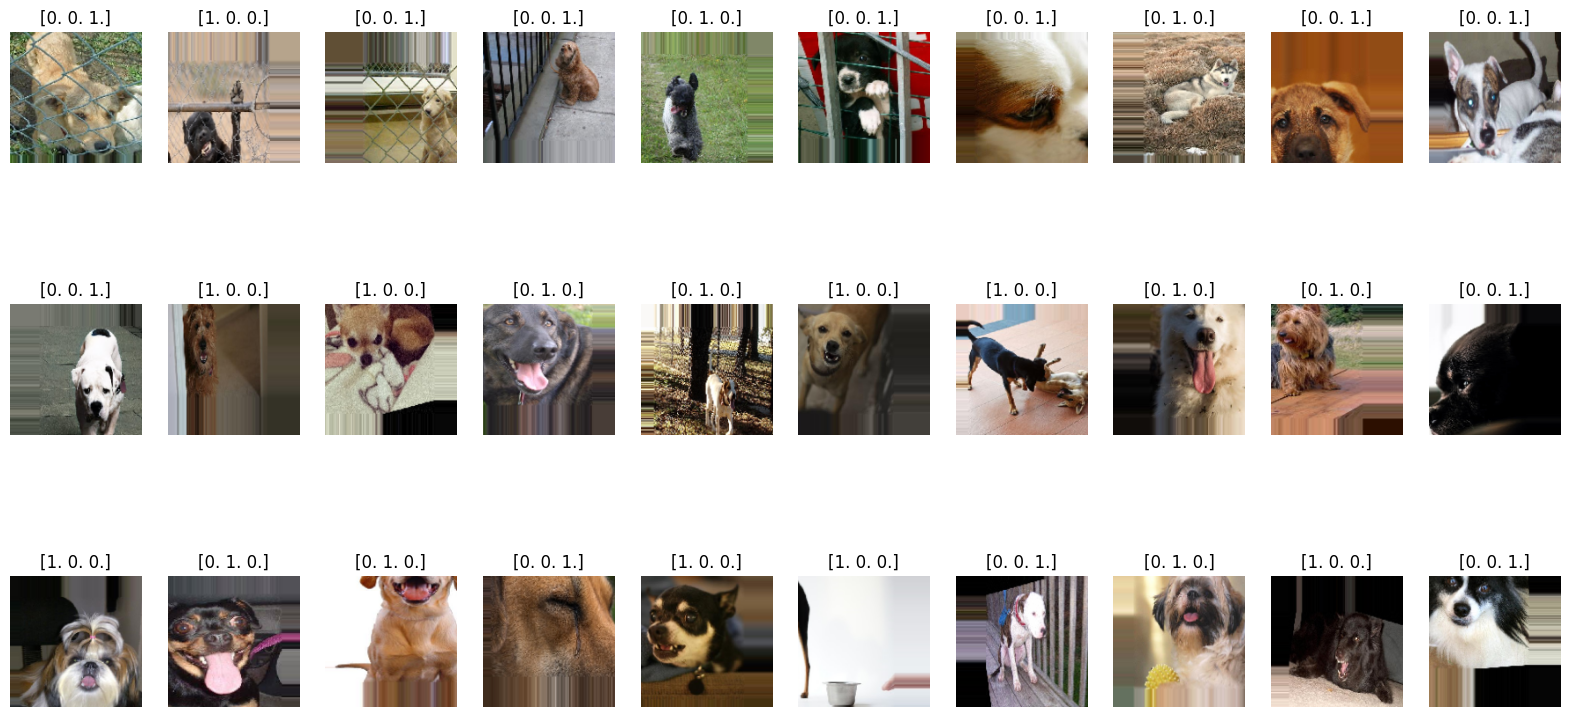

In [ ]:
images , labels = train_generator[0]

print(images.shape)

numPerCol = 10
plt.figure()
f, axarr = plt.subplots(3, numPerCol, figsize=(20, 10))

#Desplegará las imágenes que contenga el batch generado
for i in range(images.shape[0]) :
  col = i % numPerCol
  row = i // numPerCol
  axarr[row, col].axis('off')
  axarr[row, col].set_title(str(labels[i]))
  axarr[row, col].imshow(images[i])

#Modelo usando Transfer Learning

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Capas densas con regularización L2
dense_layer_1 = Dense(256, activation='relu', kernel_regularizer=L2(0.00001))
dense_layer_2 = Dense(128, activation='relu', kernel_regularizer=L2(0.00001))

# Definición del modelo secuencial
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(dense_layer_1)
model.add(layers.Dropout(0.4))
model.add(dense_layer_2)
model.add(layers.Dropout(0.4))
model.add(layers.Dense(3, activation='softmax'))

model.summary()



58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                         

In [8]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/40
131/131 [==============================] - 749s 6s/step - loss: 1.1213 - acc: 0.4208 - val_loss: 0.9289 - val_acc: 0.5759
Epoch 2/40
131/131 [==============================] - 28s 214ms/step - loss: 0.9826 - acc: 0.5341 - val_loss: 0.8543 - val_acc: 0.5960
Epoch 3/40
131/131 [==============================] - 26s 196ms/step - loss: 0.9036 - acc: 0.5691 - val_loss: 0.7813 - val_acc: 0.6696
Epoch 4/40
131/131 [==============================] - 26s 197ms/step - loss: 0.8862 - acc: 0.5777 - val_loss: 0.7496 - val_acc: 0.6719
Epoch 5/40
131/131 [==============================] - 26s 202ms/step - loss: 0.8639 - acc: 0.5960 - val_loss: 0.7362 - val_acc: 0.6741
Epoch 6/40
131/131 [==============================] - 25s 194ms/step - loss: 0.8120 - acc: 0.6363 - val_loss: 0.7285 - val_acc: 0.6920
Epoch 7/40
131/131 [==============================] - 25s 191ms/step - loss: 0.8144 - acc: 0.6420 - val_loss: 0.7049 - val_acc: 0.7009
Epoch 8/40
131/131 [==============================] - 25s

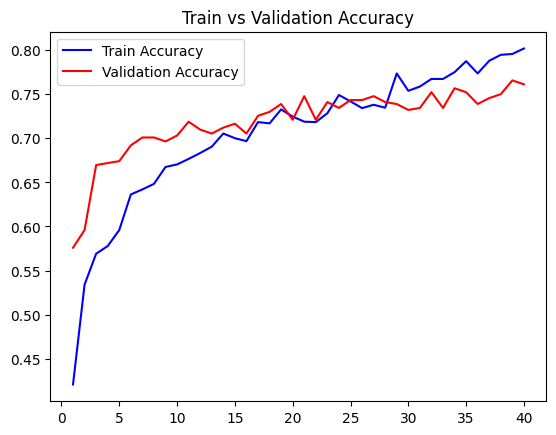

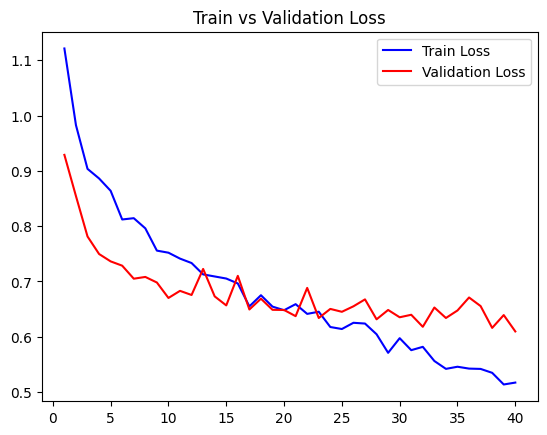

In [9]:
# Visualización de la precisión y pérdida
acc = history.history['acc']
loss = history.history['loss']
validation_acc = history.history['val_acc']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

In [10]:
# Evaluación del modelo en el conjunto de prueba
test_loss_vgg_16, test_acc_vgg_16 = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('\nTest Accuracy:\n', test_acc_vgg_16)
print('\nTest Loss:\n', test_loss_vgg_16)

28/28 [==============================] - 173s 6s/step - loss: 0.7515 - acc: 0.7299

Test Accuracy:
 0.7299107313156128

Test Loss:
 0.7515060305595398


In [75]:
from sklearn.metrics import classification_report
# Predicciones y matriz de confusión
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(test_generator.classes, y_pred)

# Reporte de clasificación
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


29/29 [==============================] - 2s 76ms/step
Classification Report
              precision    recall  f1-score   support

       angry       0.37      0.33      0.35       150
       happy       0.39      0.41      0.40       150
         sad       0.38      0.39      0.39       150

    accuracy                           0.38       450
   macro avg       0.38      0.38      0.38       450
weighted avg       0.38      0.38      0.38       450



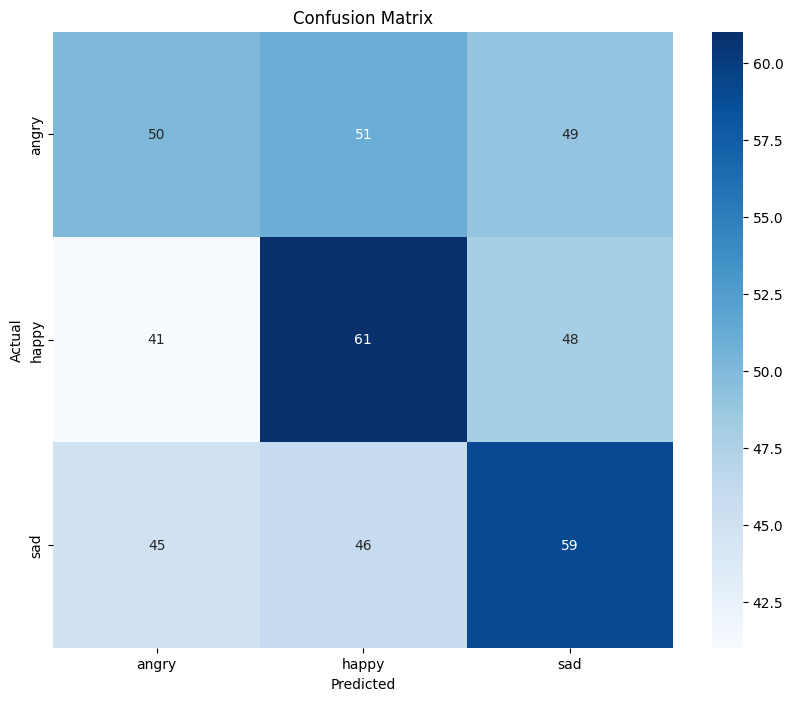

In [76]:
# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [77]:
# Guardado del modelo
model.save('modelClassificationDog.h5')
model.save('modelClassificationDog.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
